# 求解微分方程 

## 1.符号解法  
这种方法可以给出精确的解析解，适用于简单的方程或需要精确解的情况

In [2]:
# 例题8.1 使用 .subs(x, 0) 来将 x 替换为 0。
from sympy.abc import x
from sympy import diff, dsolve, simplify, Function  # diff（求导数）、dsolve（求微分方程的通解）、simplify（简化表达式）和 Function（定义函数）。

y = Function('y')
eq = diff(y(x),x,2)+2*diff(y(x),x)+2*y(x) # 定义方程
con = {y(0):0,diff(y(x),x).subs(x,0):1} # 定义初值条件,使用 .subs(x, 0) 来将 x 替换为 0。
y = dsolve(eq, ics=con)  # 'ics' 是指初始条件（Initial Conditions）
print(simplify(y))
print(y)

Eq(y(x), exp(-x)*sin(x))
Eq(y(x), exp(-x)*sin(x))


In [6]:
# 例题8.2 求微分方程的解
from sympy.abc import x
from sympy import diff, dsolve, Function, sin

y = Function('y')
eq = diff(y(x),x,2)+2*diff(y(x),x)+2*y(x)-sin(x) # 定义方程
con = {y(0):0,diff(y(x),x).subs(x,0):1}

print(dsolve(eq,ics=con))


Eq(y(x), (6*sin(x)/5 + 2*cos(x)/5)*exp(-x) + sin(x)/5 - 2*cos(x)/5)


In [7]:
# 例题8.3 求微分方程组的解
import sympy as sp
t = sp.symbols('t')
x1, x2, x3 = sp.symbols('x1,x2,x3',cls=sp.Function) # cls 参数用于指定函数的类型
eq = [x1(t).diff(t)-2*x1(t)+3*x2(t)-3*x3(t),
      x2(t).diff(t)-4*x1(t)+5*x2(t)-3*x3(t),
      x3(t).diff(t)-4*x1(t)+4*x2(t)-2*x3(t)]
con = {x1(0):1,x2(0):2,x3(0):3}
s = sp.dsolve(eq,ics=con)
print(s)

[Eq(x1(t), 2*exp(2*t) - exp(-t)), Eq(x2(t), 2*exp(2*t) - exp(-t) + exp(-2*t)), Eq(x3(t), 2*exp(2*t) + exp(-2*t))]


In [8]:
# 例题8.3 (用矩阵表示方程)
import sympy as sp
t = sp.symbols('t')
x1, x2, x3 = sp.symbols('x1:4',cls=sp.Function)
x = sp.Matrix([x1(t),x2(t),x3(t)])
A = sp.Matrix([[2,-3,3],[4,-5,3],[4,-4,2]])
eq = x.diff(t)-A*x
s = sp.dsolve(eq,ics={x1(0):1,x2(0):2,x3(0):3})
print(s)

[Eq(x1(t), 2*exp(2*t) - exp(-t)), Eq(x2(t), 2*exp(2*t) - exp(-t) + exp(-2*t)), Eq(x3(t), 2*exp(2*t) + exp(-2*t))]


In [15]:
import sympy as sp

t = sp.symbols('t')
x1,x2,x3 = sp.symbols('x1:4',cls=sp.Function)

x = sp.Matrix([x1(t),x2(t),x3(t)])
A = sp.Matrix([[2,-3,3],[4,-5,3],[4,-4,2]])
eq = x.diff(t)-A*x
s = sp.dsolve(eq,ics={x1(0):1,x2(0):2,x3(0):3})
print(s)

[Eq(x1(t), 2*exp(2*t) - exp(-t)), Eq(x2(t), 2*exp(2*t) - exp(-t) + exp(-2*t)), Eq(x3(t), 2*exp(2*t) + exp(-2*t))]


## 2.数值解法    
数值解法适用于复杂的微分方程（高阶微分方程）

In [3]:
# 例题8.4 调用格式：sol = odeint(func, y0, t)
from scipy.integrate import odeint
from numpy import arange
dy = lambda y, x: -2*y+x**2+2*x
x = arange(1,10.5,0.5)
sol = odeint(dy,2,x)
print("x ={}\n 对应的数值解 y={}".format(x,sol.T))

x =[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10. ]
 对应的数值解 y=[[ 2.          2.08484933  2.9191691   4.18723381  5.77289452  7.63342241
   9.75309843 12.12613985 14.75041934 17.62515427 20.75005673 24.12502089
  27.7500077  31.62500278 35.75000104 40.1250004  44.75000015 49.62500006
  54.75000002]]


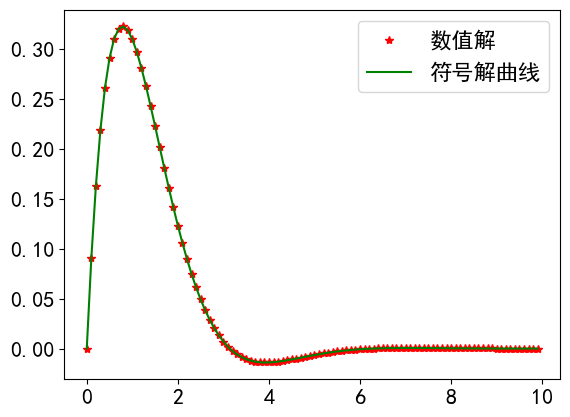

In [7]:
# 例题8.5 求例8.1的数值解，并在同一个图形界面上画出符号解和数值解的曲线
from scipy.integrate import odeint
from sympy.abc import t
import numpy as np
import matplotlib.pyplot as plt 

def Pfun(y,x): 
    y1, y2 =y  # y（一个包含两个元素的列表或数组，代表当前的y1和y2值）
    return np.array([y2,-2*y1-2*y2]) # y2是y1的导数。-2*y1-2*y2是y2的导数，即y1的二阶导数。


x = np.arange(0,10,0.1) # 创建时间点
sol1 = odeint(Pfun,[0.0,1.0],x) #[0.0, 1.0]是初始条件，即在x=0时y1=0且y2=1

plt.rc('font',size=16)
plt.rc('font',family='SimHei')
plt.plot(x,sol1[:,0],'r*',label="数值解")
plt.plot(x,np.exp(-x)*np.sin(x),'g',label="符号解曲线") # y = exp(-x)*np.sin(x)是符号解
plt.legend()
plt.show()

In [ ]:
# 例题8.6 Lorenz模型的混沌效应


# 微分方程建模方法 

## 按规律直接列方程


In [30]:
# 例题8.7 建立物体冷却过程的数学模型 

"""
t为时间，k为参数，u为温度
思路：
1.建立微分方程的数学模型：
通过定义函数u（作为温度随时间变化的函数）和微分方程eq来描述物体冷却的过程。
2.求微分方程的通解：
使用dsolve函数求解微分方程eq，得到的通解uu包含了一个未知的参数k，这个参数与物体冷却的速率有关。
3.确定微分方程解中的参数：
利用已知的初始条件或特定条件来求解参数k。在代码中，使用solve函数根据微分方程的通解uu和特定的条件（在t=10时u(t)=100）来求解k的值。
4.使用求得的参数值评估特定时间点的解：
在得到参数k的具体值后，可以将其代入通解中，进而计算出在特定时间点（如20分钟后）的物体温度。
"""

import sympy as sp
sp.var('t,k') # 使用和symbols相似，不用定义变量名 (t代表时间，k是冷却过程的比例常数)
u = sp.symbols('u',cls=sp.Function)   
eq = sp.diff(u(t),t) + k * (u(t)-24)  
uu = sp.dsolve(eq,ics={u(0):150}) # 求微分方程的符号解 # ics 在微分方程的求解过程中代表“initial conditions”，初始条件
print("微分方程的符号解:",uu)
kk = sp.solve(uu,k) # 求解比例常数k。uu是关于u(t)的解，通过它我们可以求解出k的表达式或值。kk的返回值是列表，可能有多个解
k0 = kk[0].subs({t:10.0,u(t):100.0})   # substitute（替换），用于代入特定值
print("在t=10，u=100度时的参数k值：",kk,'\t',k0)
u0 = uu.args[1] # 提出符号表达式 24 + 126*exp(-k*t) 即等号右边的部分
u20  =u1.subs({t:20,k:k0}) # 代入t=20和之前计算得到的k0，计算20分钟后物体的温度。
print("20分钟后的温度为：",u20)

微分方程的符号解: Eq(u(t), 24 + 126*exp(-k*t))
在t=10，u=100度时的参数k值： [log(126/(u(t) - 24))/t] 	 0.0505548566665147
20分钟后的温度为： 69.8412698412698


## 微元分析法      
通过分析研究对象的有关变量在一个很短的时间内的变化规律，寻找一些微元之间的关系式

In [5]:
# 例题8.8 
import sympy as sp

sp.var('h') # 定义符号变量
sp.var('t',cls=sp.Function) 
g = 9.8
eq = t(h).diff(h) - 10000*sp.pi/0.62/sp.sqrt(2*g)*(h**(3/2)-2*h**(1/2))
t = sp.dsolve(eq,ics={t(1):0})
print(t)
t = sp.simplify(t)
print(t.args[1].n(9)) # 打印简化后的解的第二个参数，并将其数值化（数值化意味着将符号解转换为具体数值，这里保留9位有效数字）

Eq(t(h), 4578.15127456044*h**(5/2) - 15260.5042485347*h**(3/2) + 10682.3529739743)
-15260.5042*h**1.5 + 4578.15127*h**2.5 + 10682.353


## 模拟近似法  
在不同的就假设下模拟实际的现象，即建立模拟近似的微分方程

In [6]:
# 例8.9 交通管理问题
import sympy as sp
import numpy as np

v0 = np.array([45,65,80])
T0 = 1; L=4.5; I=9; mu=0.7; g=9.8
T = v0/(2*mu*g)+(I+L)/v0+T0
print(T)

[4.57988338 5.94530164 6.99965379]


# 微分方程建模实例

## 1.Malthus 模型          
1.模型假设：     
（1）设x(t)表示t时刻的人口数，且x(t)连续可微       
（2）人口的增长率r是常数        
（3）人口的数量是封闭的，即人口数量的增加与减少只取决于人口中个体的生育与死亡，且每个个体都具有相同的生育能力与死亡率    
2.建模与求解        
3.模型评价       

##  2.Logistic 模型
对于模型一的修正：当人口数较少时，r为常数，当人口数较多时，视r为随着人口增加而减少的量,r-->r(x),且r(x)为x的减函数      
1.模型假设：     
（1）设r(x)为x的线性函数，r(x) = r-sx
（2）自然资源与环境条件所能容纳的最大人口数为x_m,即当x=x_m时，增长率r(x_m)=0         
2.建模与求解       
3.模型检验：   
（1）无论人口初值x_0如何，人口总数为极限x_m
（2）当0< x_0 < x_m时，dx/dt > 0,说明x(t)是单调递增的；
...


In [18]:
# 例题8.10（美国人口的预报模型）

# 1）利用非线性最小二乘法进行参数估计（xm 和 r）
import numpy as np
from scipy.optimize import curve_fit
a = []; b = []
with open("Pdata8_10_1.txt") as f:
    s = f.read().splitlines() # 返回每一行的数据
print(s)
for i in range(0,len(s),2): 
    # 读入奇数行的数据（年代数据）
    d1 = s[i].split("\t")
    for j in range(len(d1)):
        if d1[j] != '': a.append(eval(d1[j])) # 把非空行的字符串转换为年代数据

for i in range(1,len(s),2):
    # 读入偶数行的数据（当年人口总数）
    d2 = s[i].split("\t")
    for j in range(len(d2)):
        if d2[j] != '': b.append(eval(d2[j])) # 把非空行的字符串转换为人口数据

c = np.vstack((a,b)) # 构建两行数据
np.savetxt("Pdata8_10_2.txt",c) # 保存数据给2）使用

x = lambda t,r,xm: xm/(1+(xm/3.9-1)*np.exp(-r*(t-1790)))
bd = ((0,200),(0.1,1000)) # 约束两个参数的上界和下界
popt,pcov = curve_fit(x,a[1:],b[1:],bounds=bd)
print(popt)
print('2010年的预测值为：',x(2010,*popt))

['1790\t1800\t1810\t1820\t1830\t1840\t1850\t1860', '3.9\t5.3\t7.2\t9.6\t12.9\t17.1\t23.2\t31.4', '1870\t1880\t1890\t1900\t1910\t1920\t1930\t1940', '38.6\t50.2\t62.9\t76.0\t92.0\t106.5\t123.2\t131.7', '1950\t1960\t1970\t1980\t1990\t2000\t\t', '150.7\t179.3\t204.0\t226.5\t251.4\t281.4\t\t']
[2.73527906e-02 3.42441913e+02]
2010年的预测值为： 282.679783219587


In [21]:
# 例题8.10（美国人口的预报模型）

# 2）利用线性最小二乘法进行参数估计（xm 和 r）
import numpy as np

d = np.loadtxt("Pdata8_10_2.txt")
to = d[0]; x0 = d[1] # 提取年代数据以及对应的人口数据
b = np.diff(x0)/10/x0[:-1] # g构造线性方程组的常数项列
a = np.vstack([np.ones(len(x0)-1),-x0[:-1]]).T # 构造线性方程组系数矩阵
rs = np.linalg.pinv(a)@b
r = rs[0]; xm = r/rs[1]
print("人口增长率r和人口最大值xm的拟合值分别为：",np.round([r,xm],4))
xhat = xm/(1+(xm/3.9-1)*np.exp(-r*(2010-1790))) # 求预测值
print("2010的预测值为：",round(xhat,4))

人口增长率r和人口最大值xm的拟合值分别为： [3.25000e-02 2.94386e+02]
2010的预测值为： 277.9634
